## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals: Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized Present the financial benefit of this project to the marketing team

## bank client data:
 1 - age (numeric)
 
 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-    employed','services','student','technician','unemployed','unknown')
 
 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 
 5 - default: has credit in default? (categorical: 'no','yes','unknown')
 
 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
 
 7 - loan: has personal loan? (categorical: 'no','yes','unknown') 
## Related with the last contact of the current campaign:
 8 - contact: contact communication type (categorical: 'cellular','telephone')
 
 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 
 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 
 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## Other attributes:
 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 
 14 - previous: number of contacts performed before this campaign and for this client (numeric)
 
 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 
 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
 
 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 
 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 
 20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
## 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import collections

In [9]:
df = pd.read_csv("C:/Users/jemis/Desktop/bank-additional/bank-additional/bank-additional-full.csv",sep=";")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
data_dict = df.T.to_dict().values()

In [22]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()
# signal_array = data.as_matrix() #spits out a numpy matrix
# feature_names = list(data)
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

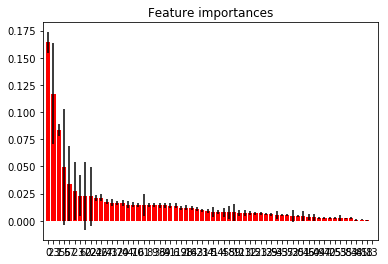

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

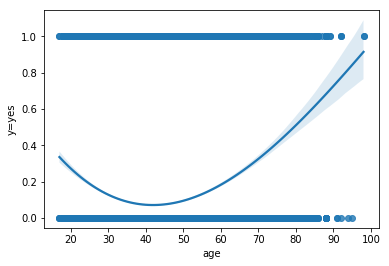

In [27]:
x = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)

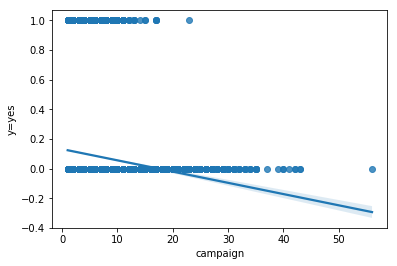

In [33]:
y = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)

## It that any campaign after 20 is useless. Hence no customer must be approached more than 20 times

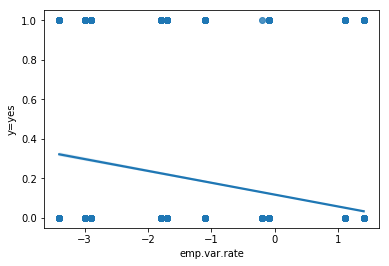

In [36]:
y = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)

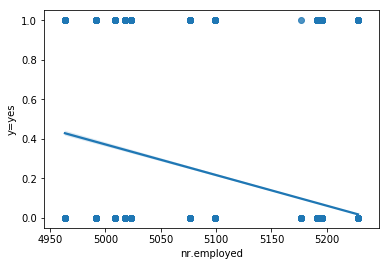

In [37]:
y= sns.regplot(x="nr.employed", y="y=yes", order=1, data=df, truncate=True)

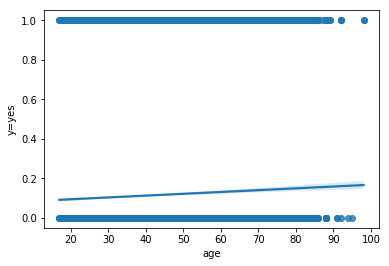

In [38]:
 y= sns.regplot(x="age", y="y=yes", order=1, data=df, truncate=True)

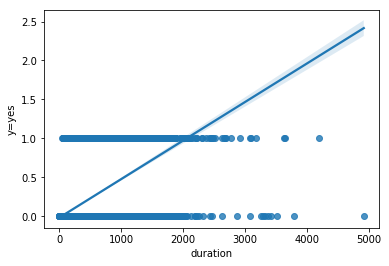

In [39]:
y= sns.regplot(x="duration", y="y=yes", order=1, data=df, truncate=True)

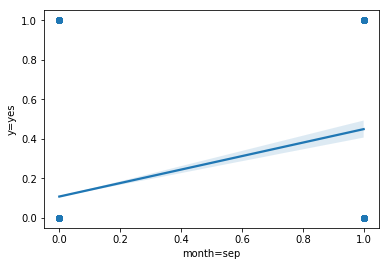

In [40]:
y = sns.regplot(x="month=sep", y="y=yes", order=1, data=df, truncate=True)

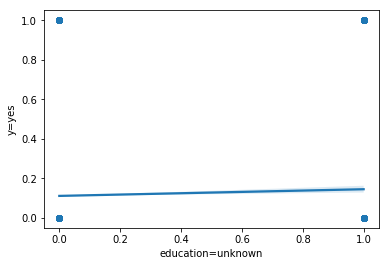

In [41]:
y = sns.regplot(x="education=unknown", y="y=yes", order=1, data=df, truncate=True)

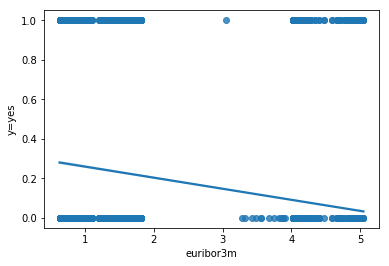

In [42]:
y = sns.regplot(x="euribor3m", y="y=yes", order=1, data=df, truncate=True)

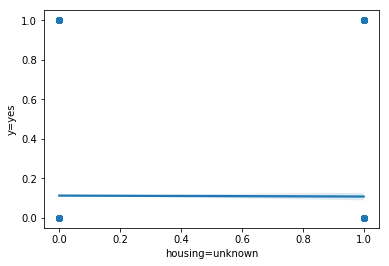

In [43]:
y = sns.regplot(x="housing=unknown", y="y=yes", order=1, data=df, truncate=True)

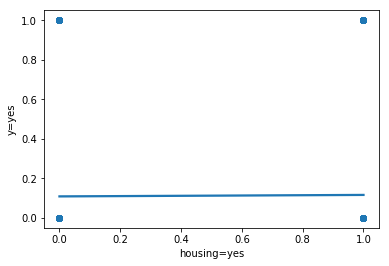

In [47]:
y = sns.regplot(x="housing=yes", y="y=yes", order=1, data=df, truncate=True)

#### Optimizing Cost Using Campaign:

In [48]:
sum(df['y=yes'])/sum(df['campaign'])

0.043875408967982296

In [46]:
print( "Nth Call \t Efficiency")
for i in range(1,30):
    ef = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(ef))

Nth Call 	 Efficiency
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


## Observation: After the 6th call is not acceptable since it has a conversion ratio of less than 1.6%.since market good conversion ratio 2.5-10% we will igrone campaign after 6th campaign .please refer below link for further explation.

https://www.wordstream.com/blog/ws/2014/03/17/what-is-a-good-conversion-rate



In [49]:
# Calculate how many calls were made in total
total_calls = sum(df['campaign'])
print(total_calls)

105754.0


In [50]:
# Calculate how many calls were made after the 6th call
extra_calls = sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [54]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print("REDUCTION IN COST:",reduction,"%")

REDUCTION IN COST: 11.384912154622993 %


In [55]:
total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [56]:
less_costly_sales=float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [57]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


## conclusion:
#### A reduction of about 11.4% in marketing cost can be achieved while maintaining 97.6% sales if any person is called less than 6 times.